# Project Workbook

## Cleaning the Data File

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy import stats
import scipy.stats as st

file = "Net_generation_for_electric_power_by_year.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [2]:
energy_df=df.drop([0, 1, 2, 4])

In [3]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [4]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [5]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [8]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [9]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [10]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [11]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [69]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [70]:
filtered_df=filtered_df.replace(to_replace=["--", "NM"], value=np.nan) 

filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,4,5,19,39,54,89,175,185,268,renewable


In [71]:
#Drop rows where all year columns have NaN data (count is 19)
filtered_df=filtered_df.dropna(axis=0, thresh=19)


filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [85]:
#Replace remaining NaN values with zero for summing
filtered_df=filtered_df.replace(np.nan, 0)


In [114]:
#Drop extra columns
condensed_df=filtered_df.drop(columns=['Energy_Source', 'units', 'source key'])

#Reformat to apply numerical format to columns in order to allow summing.
condensed_df=condensed_df.apply(pd.to_numeric,errors='ignore')

condensed_df

3,Location,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,1882826,1910613,1952714,1957188,1992054,1969737,1998390,1968838,1741123,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,110260,75079,98593,95770,95667,41665,46970,30226,24341,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,8889,14654,15105,18908,20814,18043,14336,12655,11471,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,554940,607683,567303,627172,683829,734417,814752,802372,841006,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,586,1970,2647,3568,3777,4254,4042,3200,3058,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,2,2,2,7,7,80,238,240,251,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,207,73,178,213,222,212,230,234,168,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,164,169,339,141,134,129,109,112,94,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,164,169,339,141,134,129,109,112,94,...,39,22,29,37,52,89,104,104,108,renewable


## Analysis of Renewable Energy in the US

In [116]:
us_df=condensed_df[condensed_df['Location']=='United States']

us_df

3,Location,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,1882826,1910613,1952714,1957188,1992054,1969737,1998390,1968838,1741123,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,110260,75079,98593,95770,95667,41665,46970,30226,24341,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,8889,14654,15105,18908,20814,18043,14336,12655,11471,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,554940,607683,567303,627172,683829,734417,814752,802372,841006,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,586,1970,2647,3568,3777,4254,4042,3200,3058,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
12,United States,768826,780064,763733,788528,781986,787219,806425,806208,798855,...,790204,769331,789016,797166,797178,805694,804950,807084,809409,non-renewable
13,United States,213749,260491,271512,265064,267040,286254,245843,253096,271506,...,317531,273859,265058,258046,247636,266326,298711,291148,286652,renewable
14,United States,42259,47555,49481,52328,56654,65934,74705,97084,116477,...,163886,188081,221461,247305,263306,309717,354449,382591,409035,renewable
15,United States,6737,10354,11187,14144,17811,26589,34450,55363,73886,...,120121,140749,167742,181496,190547,226790,254074,272396,294628,renewable
17,United States,0,0,2,6,16,15,16,76,157,...,921,3288,7810,14863,21229,32114,49454,59661,68047,renewable


In [166]:
#Group by Renewable
us_group=us_df.groupby('Renewable')
us_group_totals=us_group.sum()
us_group_totals

#Transpose table to show a column of dates
us_group_totals=us_group_totals.T

#Add a total and percent renewable column
us_group_totals['total']=us_group_totals.sum(axis=1)
us_group_totals['Percent renewable']=(us_group_totals['renewable']*100)/us_group_totals['total']

us_group_totals


Renewable,non-renewable,renewable,total,Percent renewable
3,,,,
2001,3341163,301845,3643008,8.285598
2002,3408163,359447,3767610,9.540451
2003,3418230,376280,3794510,9.916432
2004,3509192,374869,3884061,9.651470
2005,3595625,387373,3982998,9.725664
2006,3572789,425999,3998788,10.653203
2007,3702403,403263,4105666,9.822109
2008,3641096,457218,4098314,11.156246
2009,3437221,516681,3953902,13.067623


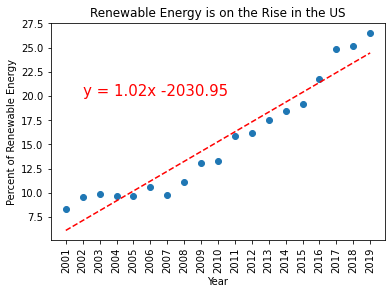

In [188]:
#Graph of renewable energy percentages for the US

year=np.arange(2001,2020,1)
percent_renewable=us_group_totals['Percent renewable']
plt.scatter(year,percent_renewable)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Percent of Renewable Energy')
plt.title('Renewable Energy is on the Rise in the US')


pr_slope, pr_int, pr_r, pr_p, pr_std_err = stats.linregress(year, percent_renewable)
pr_fit = pr_slope * year + pr_int
plt.plot(year,pr_fit,"--", color='red')

line_eq = "y = " + str(round(pr_slope,2)) + "x " + str(round(pr_int,2))
plt.annotate(line_eq,(2002,20),fontsize=15,color="red")
plt.savefig("RenewableRegressionUS.png")
plt.show()


In [184]:
year = 2020
print(f"The forecasted percentage of renewable energy in the US in 2020 is {round(pr_slope * year + pr_int,2)}%.")
year2 = 2021
print(f"The forecasted percentage of renewable energy in the US in 2021 is {round(pr_slope * year2 + pr_int,2)}%.")

The forecasted percentage of renewable energy in the US in 2020 is 25.47%.
The forecasted percentage of renewable energy in the US in 2021 is 26.49%.


Renewable energy is increasing at 1.02% per year. If renewable energy were to continue to increase at this rate, the US would reach 100% renewable energy in 2089.

## South Atlantic Region


The South Atlantic region is classified in by EIA as containing the following states:
- Delaware
- District of Columbia
- Florida
- Georgia
- Maryland
- North Carolina
- South Carolina
- Virginia
- West Virginia



In [168]:
sa_region = condensed_df[condensed_df['Location']=='South Atlantic']
sa_region

3,Location,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
657,South Atlantic,397664,414636,417727,412413,424990,423393,438823,417623,340900,...,321478,263945,266314,289884,240632,236861,209732,194546,158851,non-renewable
658,South Atlantic,48515,36792,43073,40306,38835,17723,19355,10865,8285,...,2751,1596,1429,3302,2877,2042,1570,3205,1056,non-renewable
659,South Atlantic,2904,4807,5986,7074,8323,7045,4570,3346,3290,...,1898,646,2063,1351,1568,2048,951,1506,1201,non-renewable
660,South Atlantic,55749,83945,81475,96931,112540,127628,140792,138207,167055,...,210152,259494,247125,248312,300954,317826,323990,354426,379065,non-renewable
662,South Atlantic,192326,197239,194067,199150,196034,195617,196701,197973,196560,...,187696,184645,197513,198388,199917,206905,205235,202708,205228,non-renewable
663,South Atlantic,8511,9808,19422,15807,15937,12385,10601,10272,15331,...,12946,10702,17162,13839,14101,14157,12457,19278,18143,renewable
664,South Atlantic,3245,3839,4413,4735,4810,4993,5011,5273,5613,...,7036,7840,8741,11168,11907,14825,20056,23938,26763,renewable
665,South Atlantic,0,9,170,161,154,174,168,392,742,...,1373,1608,1708,1775,1811,1966,2714,2883,2675,renewable
670,South Atlantic,3245,3830,4244,4574,4656,4819,4844,4880,4856,...,5508,5856,6411,8237,8288,8187,8789,8950,8359,renewable
671,South Atlantic,583,921,1225,1552,1682,1751,1677,1566,1542,...,1874,2152,2742,4292,4064,3690,4262,4253,4222,non-renewable


In [169]:
sa_group=sa_region.groupby('Renewable')
sa_group_totals=sa_group.sum()

#Transpose table to show a column of dates
sa_group_totals=sa_group_totals.T

#Add a total and percent renewable column
sa_group_totals['total']=sa_group_totals.sum(axis=1)
sa_group_totals['Percent renewable']=(sa_group_totals['renewable']*100)/sa_group_totals['total']

sa_group_totals

Renewable,non-renewable,renewable,total,Percent renewable
3,,,,
2001,699526,13817,713343,1.936936
2002,740324,16640,756964,2.198255
2003,745515,28045,773560,3.625446
2004,759394,25183,784577,3.209755
2005,784341,25849,810190,3.190486
2006,775184,22883,798067,2.867303
2007,803856,20775,824631,2.519309
2008,771440,20949,792389,2.643777
2009,719441,27861,747302,3.728212


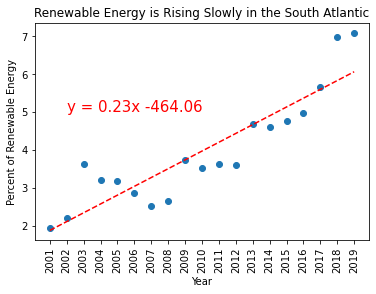

In [187]:
#Graph of renewable energy percentages for the South Atlantic Region

year=np.arange(2001,2020,1)
percent_renewable_sa=sa_group_totals['Percent renewable']
plt.scatter(year,percent_renewable_sa)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Percent of Renewable Energy')
plt.title('Renewable Energy is Rising Slowly in the South Atlantic')


prsa_slope, prsa_int, prsa_r, prsa_p, prsa_std_err = stats.linregress(year, percent_renewable_sa)
prsa_fit = prsa_slope * year + prsa_int
plt.plot(year,prsa_fit,"--", color='red')

line_eq_sa = "y = " + str(round(prsa_slope,2)) + "x " + str(round(prsa_int,2))
plt.annotate(line_eq_sa,(2002,5),fontsize=15,color="red")
plt.savefig("RenewableRegressionSouthAtlantic.png")

plt.show()

Renewable Energy is on the Rise in the South Atlantic but at a slower rate than the US. At this rate, the South Atlantic would reach 100% renewable energy in 2452.

In [183]:
year = 2020
print(f"The forecasted percentage of renewable energy in the South Atlantic in 2020 is {round(prsa_slope * year + prsa_int,2)}%.")
year2 = 2021
print(f"The forecasted percentage of renewable energy in the South Atlantic in 2021 is {round(prsa_slope * year2 + prsa_int,2)}%.")

The forecasted percentage of renewable energy in the South Atlantic in 2020 is 6.3%.
The forecasted percentage of renewable energy in the South Atlantic in 2021 is 6.53%.


## States in Region 

In [323]:
filtered_df=filtered_df.apply(pd.to_numeric,errors='ignore')
#Regional source
south_atlantic=filtered_df[filtered_df["Location"]=='South Atlantic']

#Selected for further analysis
delaware=filtered_df[filtered_df["Location"]=='Delaware']
florida=filtered_df[filtered_df["Location"]=='Florida']
virginia=filtered_df[filtered_df["Location"]=='Virginia']

#Not Selected for further analysis; generally follow regional trends
wash_dc=filtered_df[filtered_df["Location"]=='District of Columbia']
georgia=filtered_df[filtered_df["Location"]=='Georgia']
maryland=filtered_df[filtered_df["Location"]=='Maryland']
north_carolina=filtered_df[filtered_df["Location"]=='North Carolina']
south_carolina=filtered_df[filtered_df["Location"]=='South Carolina']
westvirginia=filtered_df[filtered_df["Location"]=='West Virginia']


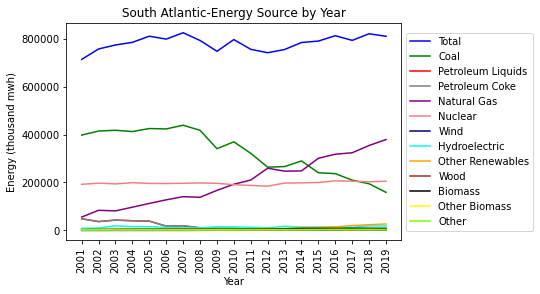

In [333]:
#South Atlantic Region
#Assign to a dataframe
sa_source=south_atlantic.drop(columns=['units', 'source key','Location','Renewable'])
sa_source=sa_source.set_index('Energy_Source')

total_energy=sa_source.sum()
years=total_energy.keys()

#Create a plot for each different energy source
total_all_sources=plt.plot(years,total_energy, color='blue', label='Total')

coal=plt.plot(years,sa_source.loc[' coal',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="green",label='Coal')

petroleum_liq=plt.plot(years,sa_source.loc[' petroleum liquids',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="red",label='Petroleum Liquids')

petroleum_coke=plt.plot(years,sa_source.loc[' petroleum liquids',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="gray",label='Petroleum Coke')

natural_gas=plt.plot(years,sa_source.loc[' natural gas',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="purple",label='Natural Gas')

nuclear=plt.plot(years,sa_source.loc[' nuclear',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="lightcoral",label='Nuclear')

wind=plt.plot(years,sa_source.loc[' wind',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="navy",label='Wind')

hydroelectric=plt.plot(years,sa_source.loc[' conventional hydroelectric',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="aqua",label='Hydroelectric')

other_renewables=plt.plot(years,sa_source.loc[' other renewables',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="orange",label='Other Renewables')

wood=plt.plot(years,sa_source.loc[' wood and wood-derived fuels',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="brown",label='Wood')

biomass=plt.plot(years,sa_source.loc[' biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016","2017", "2018","2019"]],color="black",label='Biomass')

other_biomass=plt.plot(years,sa_source.loc[' other biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="yellow",label='Other Biomass')

other=plt.plot(years,sa_source.loc[' other',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="lawngreen",label='Other')

#Set up legend and naming for chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Year")
plt.xticks(rotation = 90) 
plt.ylabel("Energy (thousand mwh)")
plt.title("South Atlantic-Energy Source by Year")
plt.savefig("South_Atlantic_ES.png")

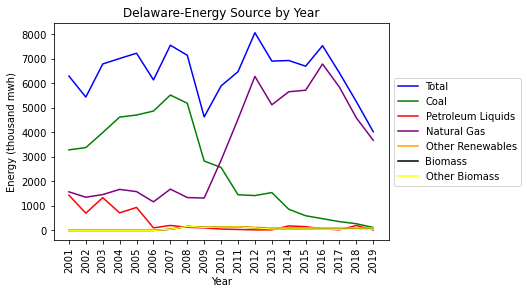

In [328]:
#Delaware
#Assign to a dataframe
delaware_source=delaware.drop(columns=['units', 'source key','Location','Renewable'])
delaware_source=delaware_source.set_index('Energy_Source')
total_energy=delaware_source.sum()
years=total_energy.keys()

#Create a plot for each different energy source
total_all_sources=plt.plot(years,total_energy, color='blue', label='Total')
coal=plt.plot(years,delaware_source.loc[' coal',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="green",label='Coal')

petroleum=plt.plot(years,delaware_source.loc[' petroleum liquids',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="red",label='Petroleum Liquids')

natural_gas=plt.plot(years,delaware_source.loc[' natural gas',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="purple",label='Natural Gas')

other_renewables=plt.plot(years,delaware_source.loc[' other renewables',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="orange",label='Other Renewables')

biomass=plt.plot(years,delaware_source.loc[' biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="black",label='Biomass')

other_biomass=plt.plot(years,delaware_source.loc[' other biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="yellow",label='Other Biomass')

#Set up legend and naming for chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Year")
plt.xticks(rotation = 90) 
plt.ylabel("Energy (thousand mwh)")
plt.title("Delaware-Energy Source by Year")
plt.savefig("Delaware_ES.png")


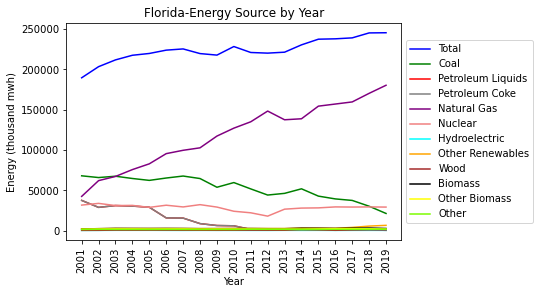

In [334]:
#Florida
#Assign to a dataframe
florida_source=florida.drop(columns=['units', 'source key','Location','Renewable'])
florida_source=florida_source.set_index('Energy_Source')
florida

total_energy=florida_source.sum()
years=total_energy.keys()

#Create a plot for each different energy source
total_all_sources=plt.plot(years,total_energy, color='blue', label='Total')

coal=plt.plot(years,florida_source.loc[' coal',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="green",label='Coal')

petroleum_liq=plt.plot(years,florida_source.loc[' petroleum liquids',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="red",label='Petroleum Liquids')

petroleum_coke=plt.plot(years,florida_source.loc[' petroleum liquids',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="gray",label='Petroleum Coke')

natural_gas=plt.plot(years,florida_source.loc[' natural gas',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="purple",label='Natural Gas')

nuclear=plt.plot(years,florida_source.loc[' nuclear',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="lightcoral",label='Nuclear')

hydroelectric=plt.plot(years,florida_source.loc[' conventional hydroelectric',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="aqua",label='Hydroelectric')

other_renewables=plt.plot(years,florida_source.loc[' other renewables',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="orange",label='Other Renewables')

wood=plt.plot(years,florida_source.loc[' wood and wood-derived fuels',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="brown",label='Wood')

biomass=plt.plot(years,florida_source.loc[' biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016","2017", "2018","2019"]],color="black",label='Biomass')

other_biomass=plt.plot(years,florida_source.loc[' other biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="yellow",label='Other Biomass')

other=plt.plot(years,florida_source.loc[' other',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="lawngreen",label='Other')

#Set up legend and naming for chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Year")
plt.xticks(rotation = 90) 
plt.ylabel("Energy (thousand mwh)")
plt.title("Florida-Energy Source by Year")
plt.savefig("Florida_ES.png")

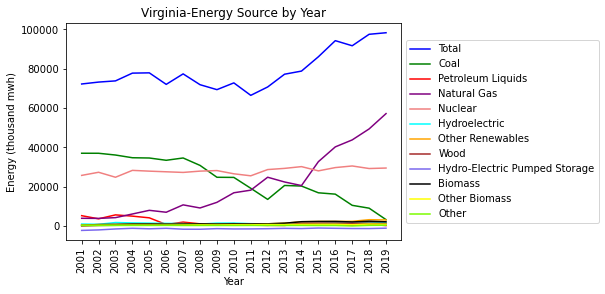

In [340]:
#Virginia
#Assign to a dataframe
virginia_source=virginia.drop(columns=['units', 'source key','Location','Renewable'])
virginia_source=virginia_source.set_index('Energy_Source')
virginia

total_energy=virginia_source.sum()
years=total_energy.keys()

#Create a plot for each different energy source
total_all_sources=plt.plot(years,total_energy, color='blue', label='Total')

coal=plt.plot(years,virginia_source.loc[' coal',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="green",label='Coal')

petroleum_liq=plt.plot(years,virginia_source.loc[' petroleum liquids',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="red",label='Petroleum Liquids')

natural_gas=plt.plot(years,virginia_source.loc[' natural gas',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="purple",label='Natural Gas')

nuclear=plt.plot(years,virginia_source.loc[' nuclear',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="lightcoral",label='Nuclear')

hydroelectric=plt.plot(years,virginia_source.loc[' conventional hydroelectric',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="aqua",label='Hydroelectric')

other_renewables=plt.plot(years,virginia_source.loc[' other renewables',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="orange",label='Other Renewables')

wood=plt.plot(years,virginia_source.loc[' wood and wood-derived fuels',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="brown",label='Wood')

hydro_storage=plt.plot(years,virginia_source.loc[' hydro-electric pumped storage',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016","2017", "2018","2019"]],color="mediumslateblue",label='Hydro-Electric Pumped Storage')

biomass=plt.plot(years,virginia_source.loc[' biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016","2017", "2018","2019"]],color="black",label='Biomass')

other_biomass=plt.plot(years,virginia_source.loc[' other biomass',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="yellow",label='Other Biomass')

other=plt.plot(years,virginia_source.loc[' other',["2001","2002","2003","2004","2005","2006","2007","2008",
"2009","2010","2011", "2012","2013","2014","2015","2016",
"2017", "2018","2019"]],color="lawngreen",label='Other')

#Set up legend and naming for chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Year")
plt.xticks(rotation = 90) 
plt.ylabel("Energy (thousand mwh)")
plt.title("Virginia-Energy Source by Year")
plt.savefig("Virginia_ES.png")


The South Atlantic region appears to be increasing its use of Natural Gas.  The natural gas pipelines and storage are heavily concentrated in the area. 

"Drilling and extracting natural gas and transporting it in pipelines results in the leakage of methane, the main component of natural gas that’s 35 times stronger than carbon dioxide at trapping heat (Source: https://www.enovaenergygroup.com/which-types-of-energy-source-produces-the-most-pollution/#:~:text=Coal%20produces%20more%20pollution%20than,global%20warming%2C%20and%20carbon%20emissions )."

##Heatmap CrossOver Analysis

In [345]:
heatmapfile = "Output/COHeatMapsData.csv"

combined_df = pd.read_csv(heatmapfile)
combined_df

,City,State,2020 Max,2019 Max,2018 Max,2017 Max,2016 Max,2020 Mean,2019 Mean,2018 Mean,2017 Mean,2016 Mean
0,Birmingham,Alabama,3.164,1.794,1.940,1.640,2.380,0.333946,0.263202,0.341005,0.364436,0.440853
1,Fairfield,Alabama,1.200,1.800,1.800,1.600,3.700,0.183963,0.204744,0.198432,0.190410,0.338163
2,Anchorage,Alaska,4.372,3.463,4.599,4.712,4.424,0.385518,0.534130,0.526335,0.682745,0.697505
3,Fairbanks,Alaska,2.566,3.547,4.469,3.634,3.510,0.322474,0.378840,0.345062,0.363771,0.383501
4,Buckeye,Arizona,1.000,1.700,0.800,0.800,1.200,0.133168,0.220844,0.232694,0.200678,0.132396
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Norfolk,Virginia,1.500,1.500,1.800,1.700,1.200,0.285640,0.299874,0.291716,0.234148,0.228125
162,Seattle,Washington,1.278,1.501,1.465,2.976,1.999,0.374014,0.411443,0.417000,0.436531,0.485500
163,Charleston,West Virginia,1.100,1.300,1.500,1.500,1.500,0.213509,0.205527,0.228336,0.243764,0.260500
164,Horicon,Wisconsin,0.337,0.503,0.430,4.811,5.115,0.094732,0.122974,0.184608,0.188376,0.193639


In [379]:
condensed_hm_df=combined_df.drop(columns=['2020 Max', '2019 Max','2018 Max','2017 Max', '2016 Max'])

california_hm=condensed_hm_df[condensed_hm_df['State']=='California']

california_hm_mean=california_hm.groupby('State').mean()
california_hm_mean

,2020 Mean,2019 Mean,2018 Mean,2017 Mean,2016 Mean
State,,,,,
California,0.298576,0.301498,0.329834,0.343447,0.327851


In [395]:
CO_levels_16=california_hm_mean['2016 Mean']['California']
CO_levels_17=california_hm_mean['2017 Mean']['California']
CO_levels_18=california_hm_mean['2018 Mean']['California']
CO_levels_19=california_hm_mean['2019 Mean']['California']
CO_levels=[CO_levels_16,CO_levels_17,CO_levels_18,CO_levels_19]
CO_levels

[0.32785145833333335, 0.3434473125, 0.32983370833333336, 0.30149835416666676]

In [408]:
california = condensed_df[condensed_df['Location']=='California']
california

california=california.groupby('Renewable')
california_totals=california.sum()

#Transpose table to show a column of dates
california_totals=california_totals.T

#Add a total and percent renewable column
california_totals['total']=california_totals.sum(axis=1)
california_totals['Percent renewable']=(california_totals['renewable']*100)/california_totals['total']

renewable_16=california_totals['Percent renewable']['2016']
renewable_17=california_totals['Percent renewable']['2017']
renewable_18=california_totals['Percent renewable']['2018']
renewable_19=california_totals['Percent renewable']['2019']

renewable_ca=(renewable_16,renewable_17,renewable_18,renewable_19)


#short_df=california_totals.tail(4)

(57.869038727414306, 64.46894142102121, 63.20312821260481, 66.45804576825282)

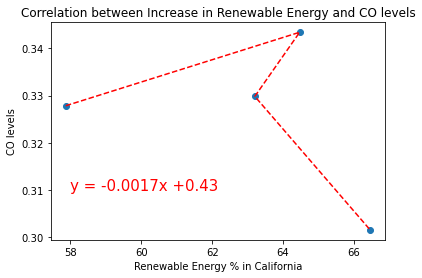

The correlation between Increase in Renewable Energy and CO levels in CA is -0.351.


In [425]:
#Regression Graph of % Increase In Renewables vs. Co levels


#percent_renewable_ca=ca_group_totals['Percent renewable']
plt.scatter(renewable_ca,CO_levels)

plt.xlabel('Renewable Energy % in California')
plt.ylabel('CO levels')
plt.title('Correlation between Increase in Renewable Energy and CO levels')


slope, intercept, r, p, std_err = stats.linregress(renewable_ca, CO_levels)
plt.plot(renewable_ca,CO_levels,"--", color='red')
line_eq = "y = " + str(round(slope,4)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(58,0.31),fontsize=15,color="red")
plt.savefig("RenewableRegressionCOLevels.png")


plt.show()
correlation = st.pearsonr(renewable_ca,CO_levels)
print(f'The correlation between Increase in Renewable Energy and CO levels in CA is {round(correlation[0],3)}.')